In [1]:
import re

In [2]:
with open("../data/x_bert.txt", 'r') as f:
    x_text = f.readlines()

x_text_cleaned = []
for x in x_text:
    # remove numbers and special characters
    x = re.sub(r'\d+', '', x)
    # remove extra spaces
    x = re.sub(r' +', ' ', x)
    x = x.strip()
    x_text_cleaned.append(x.split('\n')[0])

del x_text
x_text = x_text_cleaned
del x_text_cleaned

# save cleaned text
with open("../data/x_bert_words_only.txt", 'w') as f:
    for x in x_text:
        f.write(x + '\n')

In [3]:
# create a list of tuples (word, count)
from collections import Counter
word_counts = Counter()
for x in x_text:
    word_counts.update(x.split(' '))
word_counts = word_counts.most_common()

# save word counts
with open("../data/word_counts.txt", 'w') as f:
    for word, count in word_counts:
        f.write(word + '\t' + str(count) + '\n')

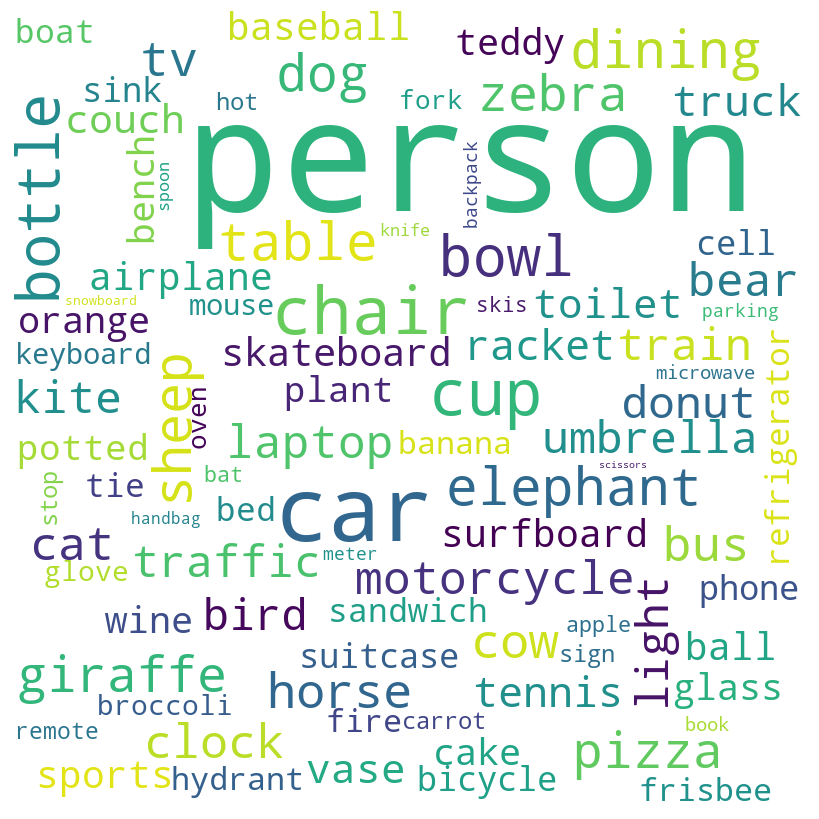

In [4]:
# create word cloud from list of strings (x_text) along with their frequencies
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10,
                collocations=False).generate(' '.join(x_text))

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# save word cloud
wordcloud.to_file("../data/wordcloud.png")